In [6]:
import sys
sys.path.append("../../")
import math as m
import random
import matplotlib.pyplot as plt
import numpy as np

0.185 185
0.229 229


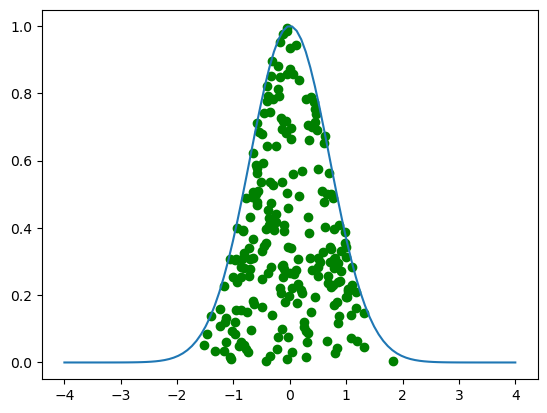

In [71]:
#create a proposed distribuction:
#Case: FLAT FUNCTION
const = [1,2]
#y = flat_function
#in x axis:
x = np.linspace(-4,4,100)
y = np.full(100,1.2)



#Function that I want to compute rejection montecarlo
#Case: GAUSSIAN FUNCTION
def gaussian_function(x):
    return np.exp(-x**2)
pdf=[]
for i in range(len(x)):
    pdf.append(gaussian_function(x[i]))


#compute integral with rejection montecarlo:

#x e y define the box which i use to generate random numbers
#pdf is the function which i want to calculate the integral
def rejection_monte_carlo_flat(n,x,y,pdf): 
    count_within_region = 0
    vector_x = []
    vector_y = []
    #now i introduce a variable that count how many point is within the box(in this case flat function)
    number = 0
    for _ in range(n):
        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate
        n_y = random.uniform(0, max(y))  # Generate a random y-coordinate
        #print(n_y)

        if n_y <= pdf(n_x):
            count_within_region += 1
            vector_x.append(n_x)
            vector_y.append(n_y)
            number = number + 1
            #print(n_x,n_y)

    integral_estimate = count_within_region / n
    return integral_estimate, vector_x, vector_y, number



#Rejection montecarlo with proposed distribution is Gaussian distribution
def rejection_monte_carlo_gauss(n,x,sigma,mu):
    count_within_region = 0
    vector_x = []
    vector_y = []
    # Define parameters
    #mu = 0  # Mean
    #sigma = 1  # Standard deviation

    # Generate data points for x-axis
    #x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Calculate the probability density function (PDF) values for the given parameters
    def gaussian_function(x):
        return np.exp(- ((x - mu) / sigma)**2) #-0.5*
    y=[]
    for i in range(len(x)):
        y.append(np.exp(- ((x[i] - mu) / sigma)**2)) #(1/(sigma * np.sqrt(2 * np.pi))) *
    #plt.plot(x,y,color='magenta') 
    #now i introduce a variable that count how many point is within the box(in this case gaussain function)
    number = 0
    for _ in range(n):
        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate
        n_y = random.uniform(0, max(y))  # Generate a random y-coordinate
        #print(n_y)

        if n_y <= gaussian_function(n_x):
            count_within_region += 1
            vector_x.append(n_x)
            vector_y.append(n_y)
            number = number+1
            #print(n_x,n_y)

    integral_estimate = count_within_region / n
    return integral_estimate, vector_x, vector_y, number

# Number of random points to generate
num_points = 1000

# Estimate the integral with a flat function
integral_estimate, vector_x, vector_y, number = rejection_monte_carlo_flat(num_points,x,y,gaussian_function)
print(integral_estimate, number)
#now i estimate the integral with a gaussian function
integral_estimate_gauss, vec_x, vec_y, num = rejection_monte_carlo_gauss(num_points,x,1,0)
print(integral_estimate_gauss, num)

fig, ax = plt.subplots()

#ax.plot(x, y) #label='Flat function'
ax.plot(x, pdf) #label='Gaussian distribuction'
#plt.scatter(vector_x, vector_y, color='green',marker='o')
plt.scatter(vec_x, vec_y, color = 'green', marker='o')
#ax.legend()
plt.show()


